# TP1 Exporation de données 

Membres de l'équipe : 
- Titouan CHOALER chot4078
- Ethan BROUILLET broe5997

## 1. Représentation des données :

In [111]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.decomposition._pca import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [112]:
data = pd.read_csv("TP1_data.csv")

data.head(60) 

,Unnamed: 0,attribut1,attribut2,attribut3,attribut4,classe
0,id1,38.0,33.0,10.0,19.0,0
1,id2,38.2,23.4,17.0,16.6,0
2,id3,33.0,24.0,19.0,23.0,0
3,id4,31.0,21.0,29.0,16.0,0
4,id5,37.0,27.0,24.0,12.0,0
5,id6,46.7,23.3,11.1,18.9,0
6,id7,36.0,18.0,29.0,12.0,0
7,id8,40.7,28.9,10.7,17.4,0
8,id9,37.4,32.6,11.0,14.7,0
9,id10,47.0,28.0,9.0,16.0,0


In [113]:
data.describe()

,attribut1,attribut2,attribut3,attribut4,classe
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,49.793220,23.486441,9.594915,14.557627,0.915254
std,10.490782,3.531995,8.174992,4.057994,0.815542
min,28.700000,16.500000,0.000000,3.700000,0.000000
25%,40.850000,21.050000,2.400000,12.000000,0.000000
50%,49.000000,23.300000,9.000000,15.100000,1.000000
75%,59.200000,25.100000,13.000000,16.950000,2.000000
max,68.500000,33.000000,29.100000,23.000000,2.000000


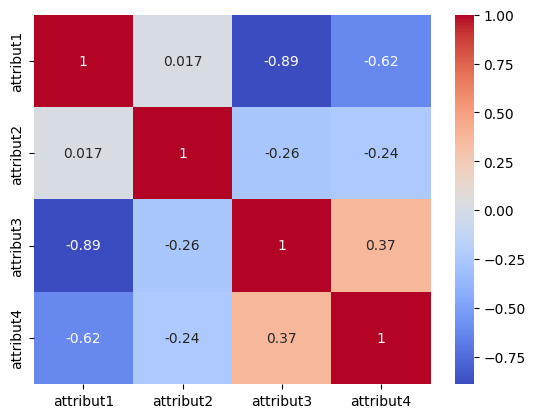

In [114]:
sns.heatmap(data[['attribut1', 'attribut2', 'attribut3', 'attribut4']].corr(), annot=True, cmap='coolwarm')
plt.show()

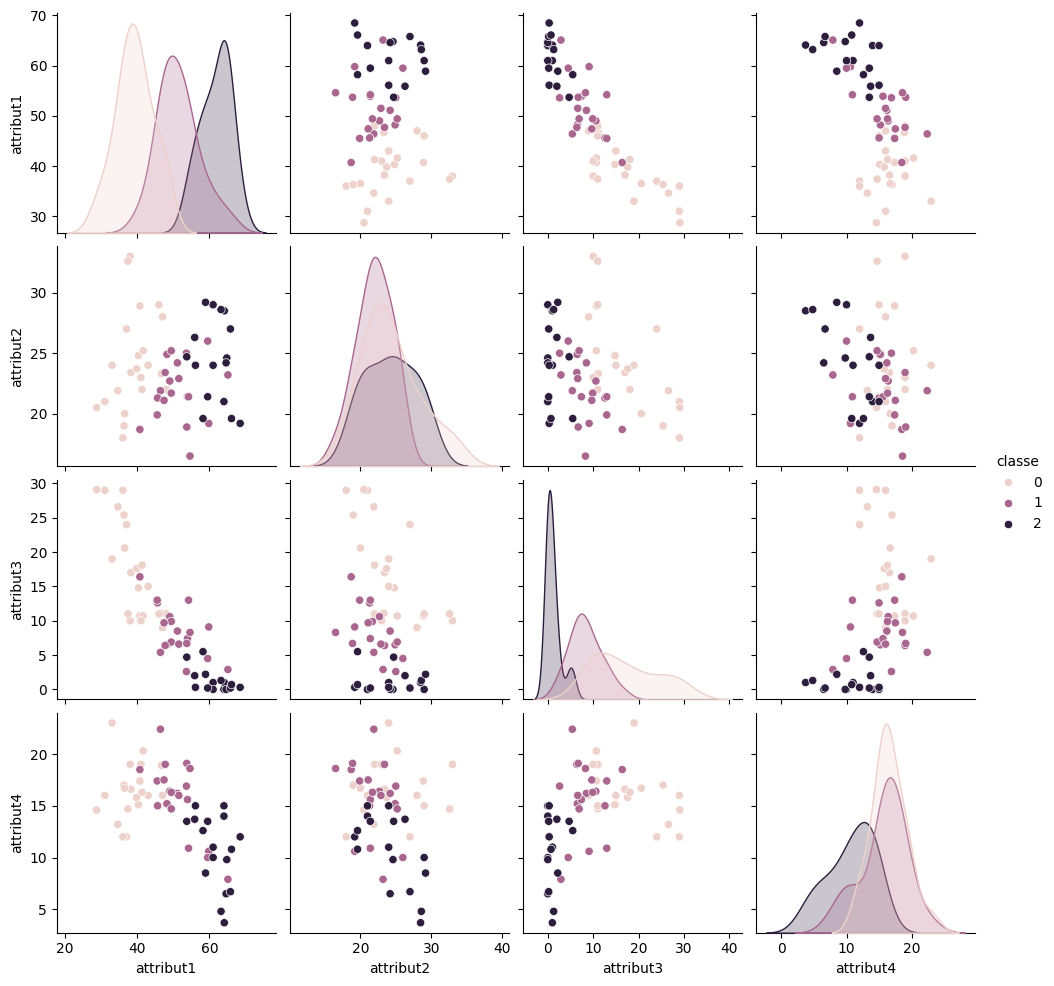

In [115]:
sns.pairplot(data[['attribut1', 'attribut2', 'attribut3', 'attribut4', 'classe']], hue='classe')
plt.show()

## a)
Avec la matrice de corrélation (heatmap) on remarque qu'il y a une forte corrélation entre "attribut1" et "attribut3" (corrélation de -0.89) et entre "attribut1" et "attribut4" (corrélation de -0.62) et entre "attribut2", "attribut3" et "attribut4" on a quand même une certaine corrélation (-0.24, -0.26 et -0.37) ce qui montre que globalement les attribtus sont corrélés et c'est un bon indicateur pour savoir si l'utilisation de l'ACP est judicieuse. Le pairplots vient confirmer ces résultats avec des nuages de points très allongé pour les attrébuts les plus corrélés. 

De plus, la présence de corrélation signifie que les variables ne sont pas indépendantes et qu'elles portent une part importante de redondance informationnelle (important pour la suite et la calcul de distance ou l'execution du KNN).

Il est donc bien d'appliquer ici l'ACP. Ainsi en projetant les données sur de nouveaux axes orthogonaux, l'ACP permet d'éliminer les corrélations entre variables et de concentrer l'essentiel de la variance sur un nombre réduit de dimensions (et faire baisser la dimension et par conséquent la puissance de calcul nécessaire aux algorithmes dans la partie 3).

Les relations de corrélation ne sont pas identiques pour les trois classes. Les graphes qui suivent montre que chaque classe possède sa propre structure de covariance (orientation et étalement du nuage de points). On remarque aussi sur le pairplot que les classes se superposent pour les attributs 1 et 4 (graphiques sur la diagonale) ce qui montre qu'une simple mesure de distance telle que la distance Euclidienne ne permettra pas de différencier un élément de la classe 0 de la classe 1 ni de la classe 2 (on suppose que c'est dnas ces cas la que la distnace de mahalanobis sera la plus judicieuse).

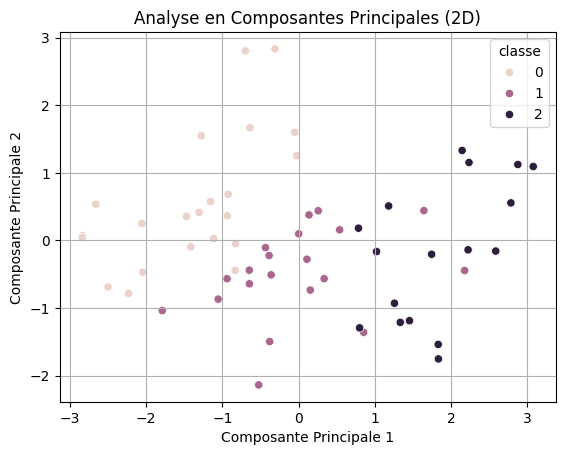

In [116]:
data_crop = data[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values

data_crop_scaled = StandardScaler().fit_transform(data_crop)
# data_crop_scaled =  data_crop

pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit_transform(data_crop_scaled)
df_pca_2 = pd.DataFrame(data=pca_2, columns=['PC1', 'PC2'])
df_pca_2['classe'] = data['classe']

pca_3 = PCA(n_components=3)
pca_3 = pca_3.fit_transform(data_crop_scaled)
df_pca_3 = pd.DataFrame(data=pca_3, columns=['PC1', 'PC2', 'PC3'])
df_pca_3['classe'] = data['classe']

sns.scatterplot(x='PC1', y='PC2', data=df_pca_2, hue='classe')
plt.title('Analyse en Composantes Principales (2D)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.grid(True)
plt.show()

fig = px.scatter_3d(df_pca_3, x='PC1', y='PC2', z='PC3', color='classe', title='Analyse en Composantes Principales (3D)', opacity=0.7)
fig.update_traces(marker=dict(size=5))
fig.show()

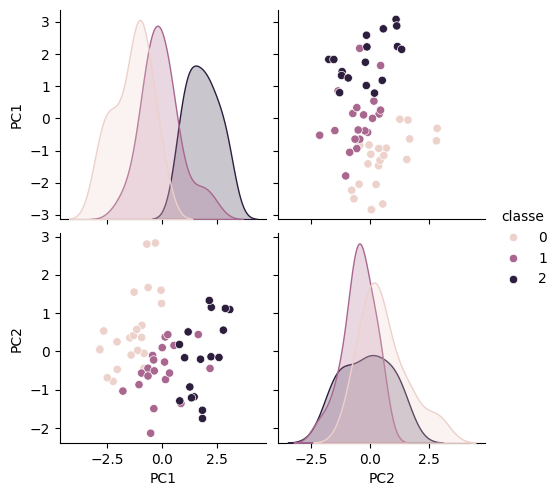

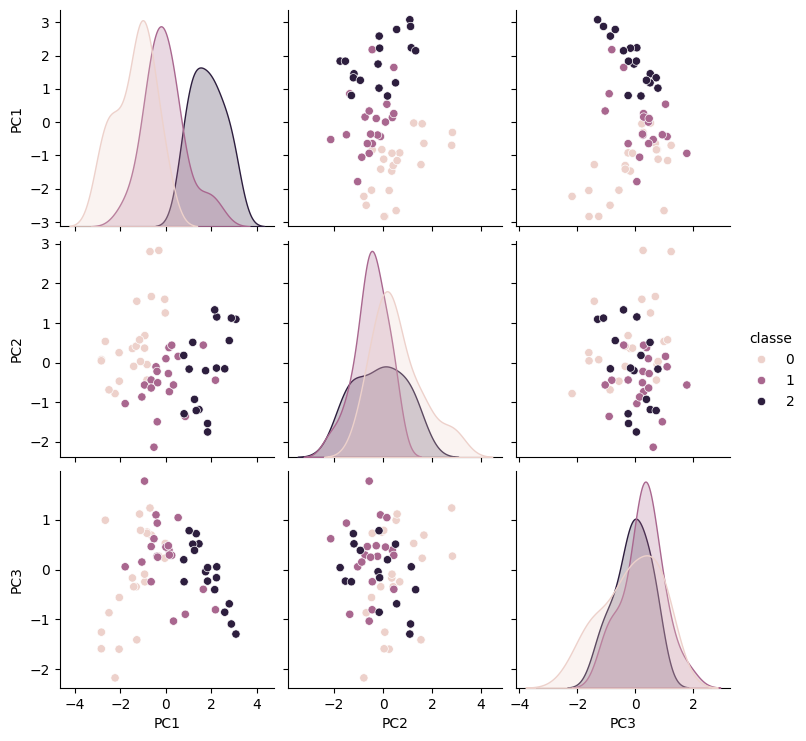

In [117]:
sns.pairplot(df_pca_2[['PC1', 'PC2', 'classe']], hue='classe')
plt.show()

sns.pairplot(df_pca_3[['PC1', 'PC2', 'PC3', 'classe']], hue='classe')
plt.show()

Malgré les ACP on retrouve les chevauchement des classes dans les graphes de la diagonale ce qui laisse présager que les distances dites classiques (métriques de Minkovski) ne seront pas suffisante pour ces jeux de données (même si PC1 semble permettre le contraire).

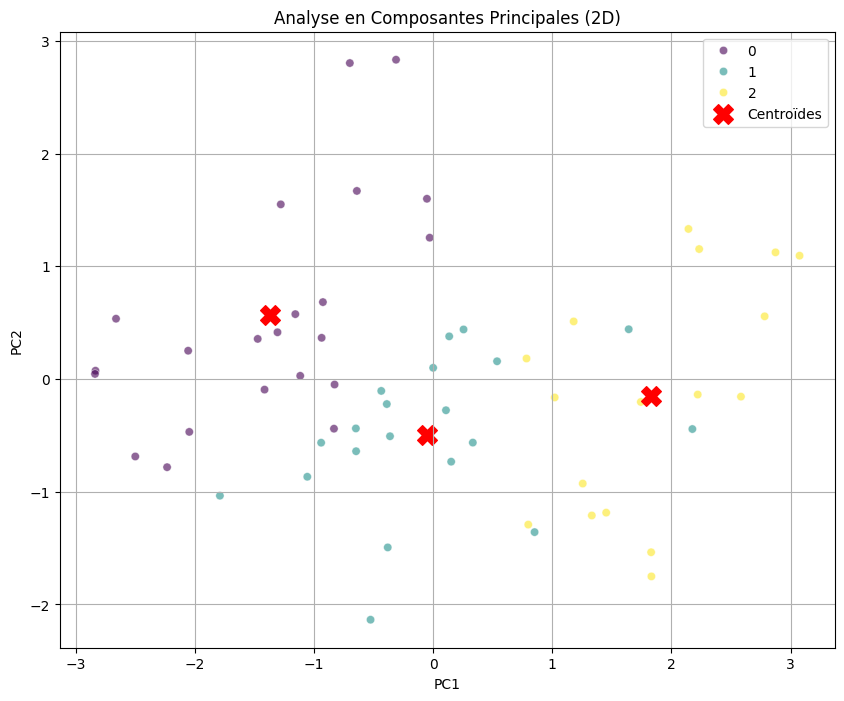

In [118]:
values0 = df_pca_2[df_pca_2['classe'] == 0]
values0 = values0[['PC1', 'PC2']].values
values1 = df_pca_2[df_pca_2['classe'] == 1]
values1 = values1[['PC1', 'PC2']].values
values2 = df_pca_2[df_pca_2['classe'] == 2]
values2 = values2[['PC1', 'PC2']].values

means = []
means.append(np.mean(values0, axis=0))
means.append(np.mean(values1, axis=0))
means.append(np.mean(values2, axis=0))
means_array_2D = np.array(means)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca_2, x='PC1', y='PC2', hue=df_pca_2['classe'], palette='viridis', alpha=0.6)
plt.scatter(means_array_2D[:, 0], means_array_2D[:, 1], c='red', s=200, marker='X', label='Centroïdes')
plt.title('Analyse en Composantes Principales (2D)')
plt.legend()
plt.grid(True)
plt.show()

values0 = df_pca_3[df_pca_3['classe'] == 0]
values0 = values0[['PC1', 'PC2', 'PC3']].values
values1 = df_pca_3[df_pca_3['classe'] == 1]
values1 = values1[['PC1', 'PC2', 'PC3']].values
values2 = df_pca_3[df_pca_3['classe'] == 2]
values2 = values2[['PC1', 'PC2', 'PC3']].values

means = []
means.append(np.mean(values0, axis=0))
means.append(np.mean(values1, axis=0))
means.append(np.mean(values2, axis=0))
means_array_3D = np.array(means)

fig = px.scatter_3d(df_pca_3, x='PC1', y='PC2', z='PC3', color='classe', title="Analyse en Composantes Principales (3D)",opacity=0.6)
fig.add_trace(go.Scatter3d(x=means_array_3D[:, 0], y=means_array_3D[:, 1], z=means_array_3D[:, 2], mode='markers', marker=dict(color='red', size=5, symbol='x', line=dict(color='black', width=2)), name='Centroïdes'))
fig.show()

In [119]:
classes = data['classe']
count2 = 0
count3 = 0

for i in range(len(classes)):
    pt = pca_2[i]
    dist1 = np.linalg.norm(pt - means_array_2D[0])
    dist2 = np.linalg.norm(pt - means_array_2D[1])
    dist3 = np.linalg.norm(pt - means_array_2D[2])
    prediction = np.argmin([dist1, dist2, dist3])
    if classes[i] != prediction:
        print("Différence de prédiction pour l'élément: ", i)
        count2 += 1
print()
print("Nombre de différences de prédiction ACP 2D : ", count2)
precision = (len(classes) - count2) / len(classes)
print()
print("Précision ACP 2D : ", precision)
print()

for i in range(len(classes)):
    pt = pca_3[i]
    dist1 = np.linalg.norm(pt - means_array_3D[0])
    dist2 = np.linalg.norm(pt - means_array_3D[1])
    dist3 = np.linalg.norm(pt - means_array_3D[2])
    prediction = np.argmin([dist1, dist2, dist3])
    if classes[i] != prediction:
        print("Différence de prédiction pour l'élément: ", i)
        count3 += 1
print()
print("Nombre de différences de prédiction ACP 3D: ", count3)
precision = (len(classes) - count3) / len(classes)
print()
print("Précision ACP 3D : ", precision)


Différence de prédiction pour l'élément:  16
Différence de prédiction pour l'élément:  29
Différence de prédiction pour l'élément:  30
Différence de prédiction pour l'élément:  32
Différence de prédiction pour l'élément:  50
Différence de prédiction pour l'élément:  58

Nombre de différences de prédiction ACP 2D :  6

Précision ACP 2D :  0.8983050847457628

Différence de prédiction pour l'élément:  5
Différence de prédiction pour l'élément:  16
Différence de prédiction pour l'élément:  29
Différence de prédiction pour l'élément:  30
Différence de prédiction pour l'élément:  32
Différence de prédiction pour l'élément:  50
Différence de prédiction pour l'élément:  58

Nombre de différences de prédiction ACP 3D:  7

Précision ACP 3D :  0.8813559322033898


## b)
Pour chaque objet, on a calculé sa distance euclidienne par rapport aux centres de gravité réels des trois classes dans l'espace réduit. On obteint avec la représentation à 2 composantes une précision de 89.83% (6 erreurs) et avec la représentation à 3 composantes une précision de 88.14% (7 erreurs).

Contre toute attente, l'ajout d'une troisième composante principale n'améliore pas la précision du classifieur par centroïde sur ce jeu de données spécifique au contraire (une erreur supplémentaire).

Cette différence surprend de par la fait que normalement l'ajout d'une composante conserve plus de données brute et donc aide à la classification. Cependant, on peut expliquer cette divergence avec le résultat attendu, par la nature même de l'ACP. Ici, la troisième composante capture une variance qui, bien que présente statistiquement, n'est pas nécessairement discriminante pour la séparation des classes. Dans notre cas, il semble que la 3ème dimension introduise un "bruit" ou une dispersion qui éloigne  une observation (la 5) de son centre de classe réel au profit d'un autre.

Attention cependant, il faut relativiser, les deux représentations atteignent un performance de presque 90% et compte tenu de la taille de l'echantillonnage cela est plus que satisfiasant. 

On peut donc affirmer pour sur que les deux premières composantes capturent déjà l'essentiel de la structure, ce qui permettant de distinguer les diffénretes classes.

## 2. Mesure de distance:
## a)

In [120]:
attributs = data[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values.T
corr = np.cov(attributs)

length = 59

dist_manhattan = np.zeros((length, length))
dist_euclidienne = np.zeros((length, length))
dist_chebyshev = np.zeros((length, length))
dist_mahalanobis = np.zeros((length, length))


for i in range(length):
    for k in range(length):
        dist_cheby_temp = []
        for j in range(4):
            diff = attributs[j][i] - attributs[j][k]
            dist_manhattan[i, k] += np.abs(diff)
            dist_euclidienne[i, k] += diff**2
            dist_cheby_temp.append(np.abs(diff))
        dist_cheby_temp_T = np.array(dist_cheby_temp).T
        dist_mahalanobis[i, k] = np.sqrt(dist_cheby_temp @ np.linalg.inv(corr) @ dist_cheby_temp_T)
        dist_euclidienne[i, k] = np.sqrt(dist_euclidienne[i, k])
        dist_chebyshev[i, k] = np.max(dist_cheby_temp)

print("Distance Manhattan:")
print(dist_manhattan)
print("Distance Euclidienne:")
print(dist_euclidienne)
print("Distance Chebyshev:")
print(dist_chebyshev)
print("Distance Mahalanobis:")
print(dist_mahalanobis)

Distance Manhattan:
[[ 0.  19.2 27.  ... 55.9 59.  44.5]
 [19.2  0.  14.2 ... 57.9 53.8 39.3]
 [27.  14.2  0.  ... 70.9 68.  53.5]
 ...
 [55.9 57.9 70.9 ...  0.  12.3 26.2]
 [59.  53.8 68.  ... 12.3  0.  14.5]
 [44.5 39.3 53.5 ... 26.2 14.5  0. ]]
Distance Euclidienne:
[[ 0.         12.12270597 14.24780685 ... 32.49876921 33.50970009
  25.47174906]
 [12.12270597  0.          8.50646813 ... 33.98484957 33.0481467
  23.72108766]
 [14.24780685  8.50646813  0.         ... 41.2791715  39.9837467
  30.73776179]
 ...
 [32.49876921 33.98484957 41.2791715  ...  0.          8.47997642
  13.24462155]
 [33.50970009 33.0481467  39.9837467  ...  8.47997642  0.
   9.41753683]
 [25.47174906 23.72108766 30.73776179 ... 13.24462155  9.41753683
   0.        ]]
Distance Chebyshev:
[[ 0.   9.6  9.  ... 27.8 28.1 20.2]
 [ 9.6  0.   6.4 ... 27.6 27.9 20. ]
 [ 9.   6.4  0.  ... 32.8 33.1 25.2]
 ...
 [27.8 27.6 32.8 ...  0.   7.4  7.6]
 [28.1 27.9 33.1 ...  7.4  0.   7.9]
 [20.2 20.  25.2 ...  7.6  7.9  0. ]]


In [121]:
dist_manhattan_test = np.zeros((length, 3))
dist_euclidienne_test = np.zeros((length, 3))
dist_chebyshev_test = np.zeros((length, 3))
dist_mahalanobis_test = np.zeros((length, 3))

values0 = data[data['classe'] == 0]
values0 = values0[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values
values1 = data[data['classe'] == 1]
values1 = values1[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values
values2 = data[data['classe'] == 2]
values2 = values2[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values

means = []
means.append(np.mean(values0, axis=0))
means.append(np.mean(values1, axis=0))
means.append(np.mean(values2, axis=0))

for i in range(length):
    for k in range(3):
        dist_cheby_temp = []
        for j in range(4):
            diff = attributs[j][i] - means[k][j]
            dist_manhattan_test[i][k] += np.abs(diff)
            dist_euclidienne_test[i][k] += diff**2
            dist_cheby_temp.append(np.abs(diff))
        dist_cheby_temp_T = np.array(dist_cheby_temp).T
        dist_mahalanobis_test[i][k] = np.sqrt(dist_cheby_temp @ np.linalg.inv(corr) @ dist_cheby_temp_T)
        dist_chebyshev_test[i][k] = np.max(dist_cheby_temp)
        dist_euclidienne_test[i][k] = np.sqrt(dist_euclidienne_test[i][k])

count_man = 0
count_euc = 0
count_che = 0
count_mah = 0
for i in range(length):
    if classes[i] != np.argmin(dist_manhattan_test[i]):
        print("Différence de prédiction pour l'élément: ", i, " pour la distance manhattan")
        count_man += 1
    if classes[i] != np.argmin(dist_euclidienne_test[i]):
        print("Différence de prédiction pour l'élément: ", i, " pour la distance euclidienne")
        count_euc += 1
    if classes[i] != np.argmin(dist_chebyshev_test[i]):
        print("Différence de prédiction pour l'élément: ", i, " pour la distance chebyshev")
        count_che += 1
    if classes[i] != np.argmin(dist_mahalanobis_test[i]):
        print("Différence de prédiction pour l'élément: ", i, " pour la distance mahalanobis")
        count_mah += 1
precision_man = (length - count_man) / length
precision_euc = (length - count_euc) / length
precision_che = (length - count_che) / length
precision_mah = (length - count_mah) / length
print()
print("Nombre de différences de prédiction pour la distance manhattan : ", count_man)
print()
print("Précision distance manhattan : ", precision_man)
print()
print("Nombre de différences de prédiction pour la distance euclidienne : ", count_euc)
print()
print("Précision distance euclidienne : ", precision_euc)
print()
print("Nombre de différences de prédiction pour la distance chebyshev : ", count_che)
print()
print("Précision distance chebyshev : ", precision_che)
print()
print("Nombre de différences de prédiction pour la distance mahalanobis : ", count_mah)
print()
print("Précision distance mahalanobis : ", precision_mah)

Différence de prédiction pour l'élément:  5  pour la distance manhattan
Différence de prédiction pour l'élément:  5  pour la distance euclidienne
Différence de prédiction pour l'élément:  5  pour la distance chebyshev
Différence de prédiction pour l'élément:  5  pour la distance mahalanobis
Différence de prédiction pour l'élément:  9  pour la distance manhattan
Différence de prédiction pour l'élément:  9  pour la distance euclidienne
Différence de prédiction pour l'élément:  9  pour la distance chebyshev
Différence de prédiction pour l'élément:  9  pour la distance mahalanobis
Différence de prédiction pour l'élément:  16  pour la distance manhattan
Différence de prédiction pour l'élément:  16  pour la distance euclidienne
Différence de prédiction pour l'élément:  16  pour la distance chebyshev
Différence de prédiction pour l'élément:  16  pour la distance mahalanobis
Différence de prédiction pour l'élément:  17  pour la distance manhattan
Différence de prédiction pour l'élément:  17  p

Avec la matrice de corrélation de la question 1(a), on a vu que les variables ne sont pas totalement interdépendances ('attribut1' notamment). Dans ce contexte, les métriques de Minkowski classiques (Euclidienne, Manhattan, Chebyshev) devraient atteindre leurs limites méthodologiques, c'est à dire qu'elles traitent chaque axe de manière indépendante, ce qui revient à ignorer la structure de redondance (dû à la correlation) des données.

Théoriquement, la distance de Mahalanobis est la plus adéquate. En intégrant l'inverse de la matrice de covariance, elle normalise l'espace en fonction des corrélations et des variances de chaque attribut, rendant la mesure de similarité invariante à l'échelle et aux relations linéaires entre variables.

Cependnat, lorsque l'onregarde les résultats obtenus pour le classement des 59 observations par rapport aux centroïdes (moyennes des classes) on constate que c'est la distance de Chebyshev qui apporte la meilleure précision (8 erreurs sur 59 soit une précision de ~86.4%) tandis que toutes les autres commettent une erreur de plus (9 erreurs sur 59 soit une précision de ~84.7%)

La distance de Mahalanobis est censé être la solution la plus rigoureuse sur le plan statistique mais c'est la distance de Chebyshev obtient empiriquement un meilleur score (une erreur de moins). Ces résultats peuvent probablement s'expliquer par la faible taille de l'ensemble à classer (N=59). Sur un jeu de données petit comme le notre, la distance de Chebyshev est peut être moins sensible au bruit global que les autres métriques, ou simplement bénéficier d'un "coup de chance" sur une observation située en bordure de décision.

## b)
Pour le calcul de la distance de Mahalanobis,l'utilisation d'une matrice de covariance globale (Σ unique pour tout le dataset) a été fait dans la partie a). On s'occupe donc du cas avec un matrices de covariance par classe $\Sigma_k$.

In [122]:
classe0 = data[data['classe'] == 0]
classe1 = data[data['classe'] == 1]
classe2 = data[data['classe'] == 2]

data_values = data[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values
classe0_T = classe0[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values.T
classe1_T = classe1[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values.T
classe2_T = classe2[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values.T

sigma = []
sigma.append(np.cov(classe0_T))
sigma.append(np.cov(classe1_T))
sigma.append(np.cov(classe2_T))

dist_mahalanobis_classe = np.zeros((length, 3))

for i in range(length):
    for k in range(3):
        diff = data_values[i] - means[k]
        diff_tmp = np.linalg.inv(sigma[k]) 
        dist_mahalanobis_classe[i][k] = np.sqrt(diff @ diff_tmp @ diff.T)
    
count_mah = 0
for i in range(length):
    if classes[i] != np.argmin(dist_mahalanobis_classe[i]):
        print("Différence de prédiction pour l'élément: ", i, " pour la distance mahalanobis")
        count_mah += 1
precision_mah = (length - count_mah) / length   

print("Nombre de différences de prédiction pour la distance mahalanobis : ", count_mah)
print()
print("Précision distance mahalanobis : ", precision_mah)



Différence de prédiction pour l'élément:  18  pour la distance mahalanobis
Différence de prédiction pour l'élément:  29  pour la distance mahalanobis
Différence de prédiction pour l'élément:  32  pour la distance mahalanobis
Différence de prédiction pour l'élément:  50  pour la distance mahalanobis
Nombre de différences de prédiction pour la distance mahalanobis :  4

Précision distance mahalanobis :  0.9322033898305084


Les tests donnent un précision de ~93.2% (seuelement 4 erreur de classification) ce qui est mieux que toutes les autres métriques de distance testées (Avec la distance de Chebyshev on obtenait 8 erreurs). 

On peut expliquer cette amélioration des performances par d'un côté, le fait que précédement on a vu que les nuages de points démontrait que la dispersion et l'orientation des classes ne sont pas identiques et que chaque classe possède sa propre "morphologie" dans l'espace des attributs. Imposer une matrice de covariance globale revient à forcer une forme moyenne qui ne rend justice à aucune classe, tandis que l'approche par classe permet au modèle d'épouser localement la structure de chaque groupe. et d'un autre côté, on a qu'en utilisant un $\Sigma_k$ propre à chaque classe, la distance de Mahalanobis devient plus "flexible". C'est à dire qu'elle est capable de reconnaître qu'une même distance peut représenter une forte probabilité d'appartenance pour une classe très dispersée, mais une probabilité quasi nulle pour une classe très compacte.

# 3 Choix du modèle de classification:
## a)

In [123]:
data_values = data[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values
data_values = StandardScaler().fit_transform(data_values)


pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit_transform(data_values)
df_pca_2 = pd.DataFrame(data=pca_2, columns=['PC1', 'PC2'])

pca_2_values = df_pca_2[['PC1', 'PC2']].values

classe0 = pca_2_values[classes == 0]
classe1 = pca_2_values[classes == 1]
classe2 = pca_2_values[classes == 2]

means_pca = []
means_pca.append(np.mean(classe0, axis=0))
means_pca.append(np.mean(classe1, axis=0))
means_pca.append(np.mean(classe2, axis=0))

sigma_pca = []
sigma_pca.append(np.cov(classe0, rowvar=False))
sigma_pca.append(np.cov(classe1, rowvar=False))
sigma_pca.append(np.cov(classe2, rowvar=False))
sigma_pca_inv = [np.linalg.inv(s) for s in sigma_pca]

dist_mahalanobis_cpa = np.zeros((length, 3))

for i in range(length):
    for k in range(3):
        diff = pca_2_values[i] - means_pca[k]
        dist_mahalanobis_cpa[i][k] = np.sqrt(diff @ sigma_pca_inv[k] @ diff.T)

predictions_centroide = np.argmin(dist_mahalanobis_cpa, axis=1)
nb_erreurs_centroide = np.sum(predictions_centroide != classes)
precision_centroide = (length - nb_erreurs_centroide) / length

print("Nombre d'erreurs pour les centroïdes : ", nb_erreurs_centroide)
print("Précision pour les centroïdes : ", precision_centroide)



sigma_global = np.cov(pca_2_values, rowvar=False)
inv_sigma_global = np.linalg.inv(sigma_global)
    
knn_2_maha = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'VI': inv_sigma_global})
knn_2_maha.fit(pca_2_values, classes)

predictions = knn_2_maha.predict(pca_2_values)
nb_erreurs_knn = np.sum(predictions != classes)
precision_knn = (length - nb_erreurs_knn) / length

print("Nombre d'erreurs pour le KNN avec matrice de covariance globale : ", nb_erreurs_knn)
print("Précision pour le KNN avec matrice de covariance globale : ", precision_knn)

    
knn_2_cheby = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn_2_cheby.fit(pca_2_values, classes)

predictions = knn_2_cheby.predict(pca_2_values)
nb_erreurs_knn = np.sum(predictions != classes)
precision_knn = (length - nb_erreurs_knn) / length

print("Nombre d'erreurs pour le KNN avec chebyshev : ", nb_erreurs_knn)
print("Précision pour le KNN avec chebyshev : ", precision_knn)



distance = np.zeros((length, length))
dist_mahalanobis_knn = [[[] for i in range(length)] for i in range(length)]
knn_5 = [[] for i in range(length)]
predictions_knn = []
for i in range(length):
    for k in range(length):
        if i == k:
            continue
        diff = pca_2_values[i] - pca_2_values[k]
        dist = np.sqrt(diff @ sigma_pca_inv[classes[k]] @ diff.T)
        dist_mahalanobis_knn[i][k].append([dist, classes[k]])
    dist_mahalanobis_knn[i].sort()
    knn_5[i].append(dist_mahalanobis_knn[i][:6])
    majo = [0, 0, 0]

    for tmp in knn_5[i]:
        for v in tmp:
            if v == []:
                continue
            else: 
                classes_v = v[0][1]
                majo[classes_v] += 1
        predictions_knn.append(np.argmax(majo))

nb_erreurs_knn = np.sum(predictions_knn != classes)
precision_knn = (length - nb_erreurs_knn) / length

print("Nombre d'erreurs pour le KNN avec matrice de covariance par classe : ", nb_erreurs_knn)
print("Précision pour le KNN avec matrice de covariance par classe : ", precision_knn)


Nombre d'erreurs pour les centroïdes :  8
Précision pour les centroïdes :  0.864406779661017
Nombre d'erreurs pour le KNN avec matrice de covariance globale :  6
Précision pour le KNN avec matrice de covariance globale :  0.8983050847457628
Nombre d'erreurs pour le KNN avec chebyshev :  5
Précision pour le KNN avec chebyshev :  0.9152542372881356
Nombre d'erreurs pour le KNN avec matrice de covariance par classe :  8
Précision pour le KNN avec matrice de covariance par classe :  0.864406779661017


In [124]:
pca_3 = PCA(n_components=3)
pca_3 = pca_3.fit_transform(data_values)
df_pca_3 = pd.DataFrame(data=pca_3, columns=['PC1', 'PC2', 'PC3'])

pca_3_values = df_pca_3[['PC1', 'PC2', 'PC3']].values

classe0 = pca_3_values[classes == 0]
classe1 = pca_3_values[classes == 1]
classe2 = pca_3_values[classes == 2]

means_pca = []
means_pca.append(np.mean(classe0, axis=0))
means_pca.append(np.mean(classe1, axis=0))
means_pca.append(np.mean(classe2, axis=0))

sigma_pca = []
sigma_pca.append(np.cov(classe0, rowvar=False))
sigma_pca.append(np.cov(classe1, rowvar=False))
sigma_pca.append(np.cov(classe2, rowvar=False))
sigma_pca_inv = [np.linalg.inv(s) for s in sigma_pca]

dist_mahalanobis_cpa = np.zeros((length, 3))

for i in range(length):
    for k in range(3):
        diff = pca_3_values[i] - means_pca[k]
        dist_mahalanobis_cpa[i][k] = np.sqrt(diff @ sigma_pca_inv[k] @ diff.T)

predictions_centroide = np.argmin(dist_mahalanobis_cpa, axis=1)
nb_erreurs_centroide = np.sum(predictions_centroide != classes)
precision_centroide = (length - nb_erreurs_centroide) / length

print("Nombre d'erreurs pour les centroïdes : ", nb_erreurs_centroide)
print("Précision pour les centroïdes : ", precision_centroide)
print()



sigma_global = np.cov(pca_3_values, rowvar=False)
inv_sigma_global = np.linalg.inv(sigma_global)
    
# problème avec la distance par classe du knn puisuqe ne peut pas prendre une liste de matrice
knn_3_maha = KNeighborsClassifier(n_neighbors=5, metric='mahalanobis', metric_params={'VI': inv_sigma_global})
knn_3_maha.fit(pca_3_values, classes)

predictions = knn_3_maha.predict(pca_3_values)
nb_erreurs_knn = np.sum(predictions != classes)
precision_knn = (length - nb_erreurs_knn) / length

print("Nombre d'erreurs pour le KNN avec matrice de covariance globale : ", nb_erreurs_knn)
print("Précision pour le KNN avec matrice de covariance globale : ", precision_knn)
print()

knn_3_cheby = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn_3_cheby.fit(pca_3_values, classes)

predictions = knn_3_cheby.predict(pca_3_values)
nb_erreurs_knn = np.sum(predictions != classes)
precision_knn = (length - nb_erreurs_knn) / length

print("Nombre d'erreurs pour le KNN avec chebyshev : ", nb_erreurs_knn)
print("Précision pour le KNN avec chebyshev : ", precision_knn)
print()


distance = np.zeros((length, length))
dist_mahalanobis_knn = [[[] for i in range(length)] for i in range(length)]
knn_5 = [[] for i in range(length)]
predictions_knn = []
for i in range(length):
    for k in range(length):
        if i == k:
            continue
        diff = pca_3_values[i] - pca_3_values[k]
        dist = np.sqrt(diff @ sigma_pca_inv[classes[k]] @ diff.T)
        dist_mahalanobis_knn[i][k].append([dist, classes[k]])
    dist_mahalanobis_knn[i].sort()
    knn_5[i].append(dist_mahalanobis_knn[i][:6])
    majo = [0, 0, 0]

    for tmp in knn_5[i]:
        for v in tmp:
            if v == []:
                continue
            else: 
                classes_v = v[0][1]
                majo[classes_v] += 1
        predictions_knn.append(np.argmax(majo))

nb_erreurs_knn = np.sum(predictions_knn != classes)
precision_knn = (length - nb_erreurs_knn) / length

print("Nombre d'erreurs pour le KNN avec matrice de covariance par classe : ", nb_erreurs_knn)
print("Précision pour le KNN avec matrice de covariance par classe : ", precision_knn)


Nombre d'erreurs pour les centroïdes :  7
Précision pour les centroïdes :  0.8813559322033898

Nombre d'erreurs pour le KNN avec matrice de covariance globale :  5
Précision pour le KNN avec matrice de covariance globale :  0.9152542372881356

Nombre d'erreurs pour le KNN avec chebyshev :  5
Précision pour le KNN avec chebyshev :  0.9152542372881356

Nombre d'erreurs pour le KNN avec matrice de covariance par classe :  10
Précision pour le KNN avec matrice de covariance par classe :  0.8305084745762712


Aux vues des mauvaises performances du KNN avec mahalanobis et une matrice de covariance par classe, cela a remis en cause les affirmations obtenues dans les parties précédentes et que mélanger les "améliorations" a peut être eu l'effet inverse de ce que l'on cherchait (on obtenait 4 erreurs seulelement sur des données non "nettoyées" par l'ACP). 
De plus, l'algorithme KNN de sklearn ne permet pas de faire mahalanobis avec une matrice de covariance par classe nativement donc il a fallu recoder le KNN à la main pour ce cas là. 

Que ce soit avec l'ACP 2D ou 3D, le KNN abouti toujours à la meilleure précision. 
Là ou ça se discute c'est entre l'utilisation dela distance de Chebytchev et Mahalanobis avec matrice de covariance globale. 

## b)


In [125]:
data_values = data[['attribut1', 'attribut2', 'attribut3', 'attribut4']].values
data_values = StandardScaler().fit_transform(data_values)
classe = data['classe']
cov_types = ['spherical', 'diag', 'tied', 'full']
mapping = {0: 0, 1: 1, 2: 2}

for i in cov_types:
    if i == 'full':
        mapping = {0: 0, 1: 1, 2: 2}
        gmmF = GaussianMixture(n_components=3, covariance_type=i, n_init=20, random_state=42)
        gmmF.fit(data_values)
        predictions = gmmF.predict(data_values)
    else: 
        if i == 'diag':
            mapping = {0: 1, 1: 2, 2: 0}
            gmm = GaussianMixture(n_components=3, covariance_type=i, n_init=20, random_state=42)
            gmm.fit(data_values)
        if i == 'spherical':
            mapping = {2: 2, 1: 0, 0: 1}
        if i == 'tied':
            mapping = {0: 1, 2: 2, 1: 0}
        gmm = GaussianMixture(n_components=3, covariance_type=i, n_init=20, random_state=42)
        gmm.fit(data_values)
        predictions = gmm.predict(data_values)
    predictions = [mapping[p] for p in predictions]
    nb_erreurs_gmm = np.sum(predictions != classe)
    precision_gmm = (length - nb_erreurs_gmm) / length
    print("Nombre d'erreurs pour le GMM ", i, " : ", nb_erreurs_gmm)
    print(f"Précision pour le GMM {i} : {precision_gmm:.2%}")
    print()

Nombre d'erreurs pour le GMM  spherical  :  19
Précision pour le GMM spherical : 67.80%

Nombre d'erreurs pour le GMM  diag  :  15
Précision pour le GMM diag : 74.58%

Nombre d'erreurs pour le GMM  tied  :  22
Précision pour le GMM tied : 62.71%

Nombre d'erreurs pour le GMM  full  :  13
Précision pour le GMM full : 77.97%



Le modèle avec une covariance de type 'full' obtient la meilleure précision (77.97%), ce qui montre que les données se regroupent selon des distributions normales multidimensionnelles dont chaque classe possède son propre étalement et sa propre orientation. On valide l'hypothèse. 

La différence de précision entre le GMM (78%) et la méthode la distance de Mahalanobis (93%) ne remet pas en cause l'hypothèse gaussienne parce qu'elle montre juste la difficulté du clustering non-supervisé à séparer parfaitement des classes qui présentent de légers chevauchements (voir tableaux suite à l'ACP qui montrent des frontières floues entre les différentes classes). 

Le mode 'full' offre une meilleure précision par rapport aux modes 'spherical', 'diagonal' ou 'tied' confirme que les classes ont des structures de covariance distinctes et non-circulaires (c'est cohérent avec ce qu'on a vu lors de la représentation des données dans les pairplot où il ne ressortait pas de forme distinctes, c'est à dire ni éllipses droites, ni cercles, ni que toutes les classes n'aient la même forme). 

# 4

Avec KNN 2-D Mahalanobis : la classe de la nouvelle observation est :  1
Avec KNN 3-D Mahalanobis : la classe de la nouvelle observation est :  1
Avec KNN 2-D Chebyshev : la classe de la nouvelle observation est :  1
Avec KNN 3-D Chebyshev : la classe de la nouvelle observation est :  1
Avec GMM : la classe de la nouvelle observation est :  1


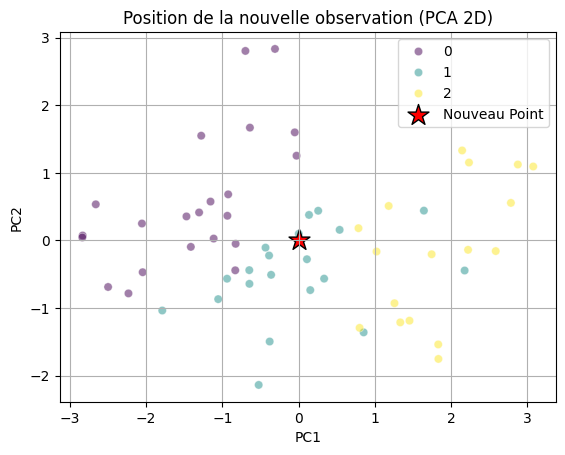

In [134]:
new_data = np.array([[52.1, 23.0, 6.1, 16.5]])
new_data_scaled = StandardScaler().fit(new_data)
new_data_scaled = new_data_scaled.transform(new_data)
data_scaled = StandardScaler().fit_transform(data_values)
pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit(data_scaled)
pca_3 = PCA(n_components=3)
pca_3 = pca_3.fit(data_scaled)
new_data_pca2 = pca_2.transform(new_data_scaled)
new_data_pca3 = pca_3.transform(new_data_scaled)

prediction_knn_2_maha = knn_2_maha.predict(new_data_pca2)[0]
print("Avec KNN 2-D Mahalanobis : la classe de la nouvelle observation est : ", prediction_knn_2_maha)

prediction_knn_3_maha = knn_3_maha.predict(new_data_pca3)[0]
print("Avec KNN 3-D Mahalanobis : la classe de la nouvelle observation est : ", prediction_knn_3_maha)

prediction_knn_2_cheby = knn_2_cheby.predict(new_data_pca2)[0]
print("Avec KNN 2-D Chebyshev : la classe de la nouvelle observation est : ", prediction_knn_2_cheby)

prediction_knn_3_cheby = knn_3_cheby.predict(new_data_pca3)[0]
print("Avec KNN 3-D Chebyshev : la classe de la nouvelle observation est : ", prediction_knn_3_cheby)

prediction_gmm = gmmF.predict(new_data_scaled)[0]
print("Avec GMM : la classe de la nouvelle observation est : ", prediction_gmm)

df_pca_2['classe'] = data['classe']
df_pca_3['classe'] = data['classe']

sns.scatterplot(x='PC1', y='PC2', data=df_pca_2, hue='classe', palette='viridis', alpha=0.5)
plt.scatter(new_data_pca2[0, 0], new_data_pca2[0, 1], c='red', s=250, marker='*', edgecolors='black', label='Nouveau Point')
plt.title("Position de la nouvelle observation (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()


fig = px.scatter_3d(df_pca_3, x='PC1', y='PC2', z='PC3', color='classe', opacity=0.4)
fig.add_trace(go.Scatter3d(
    x=[new_data_pca3[0, 0]], 
    y=[new_data_pca3[0, 1]], 
    z=[new_data_pca3[0, 2]],
    mode='markers',
    marker=dict(size=12, color='red', symbol='cross', line=dict(color='white', width=2)),
    name='Nouvelle Observation'
))
fig.show()


Tous les modèles sont d'accord, le point [52.1, 23.0, 6.1, 16.5] est de classe 1. 
On voit clairement, avec les graphiques que ce nouveau point est de classe 1 ce qui valide donc le résultats des algorithmes.